In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import colour
from colour.plotting import *
import pylab
from pylab import *
from matplotlib import path
from scipy.interpolate import interp1d
from scipy.integrate import simps, trapz
%matplotlib inline

In [2]:
rcParams['legend.numpoints'] = 1

In [4]:
# ITE Traffic Color Specification
Traf_Spec = np.array(pd.read_csv('./datasets/ITE_color_spec.csv'))



In [5]:
Traf_Spec = np.transpose(Traf_Spec)
Traf_Red = Traf_Spec[0:2]
Traf_Amber = Traf_Spec[3:5]
Traf_Green = Traf_Spec[6:8]



In [6]:
Blackbody_xy = np.array(pd.read_csv('./datasets/BlackBody_xy.csv'))
Blackbody_xy = np.transpose(Blackbody_xy)


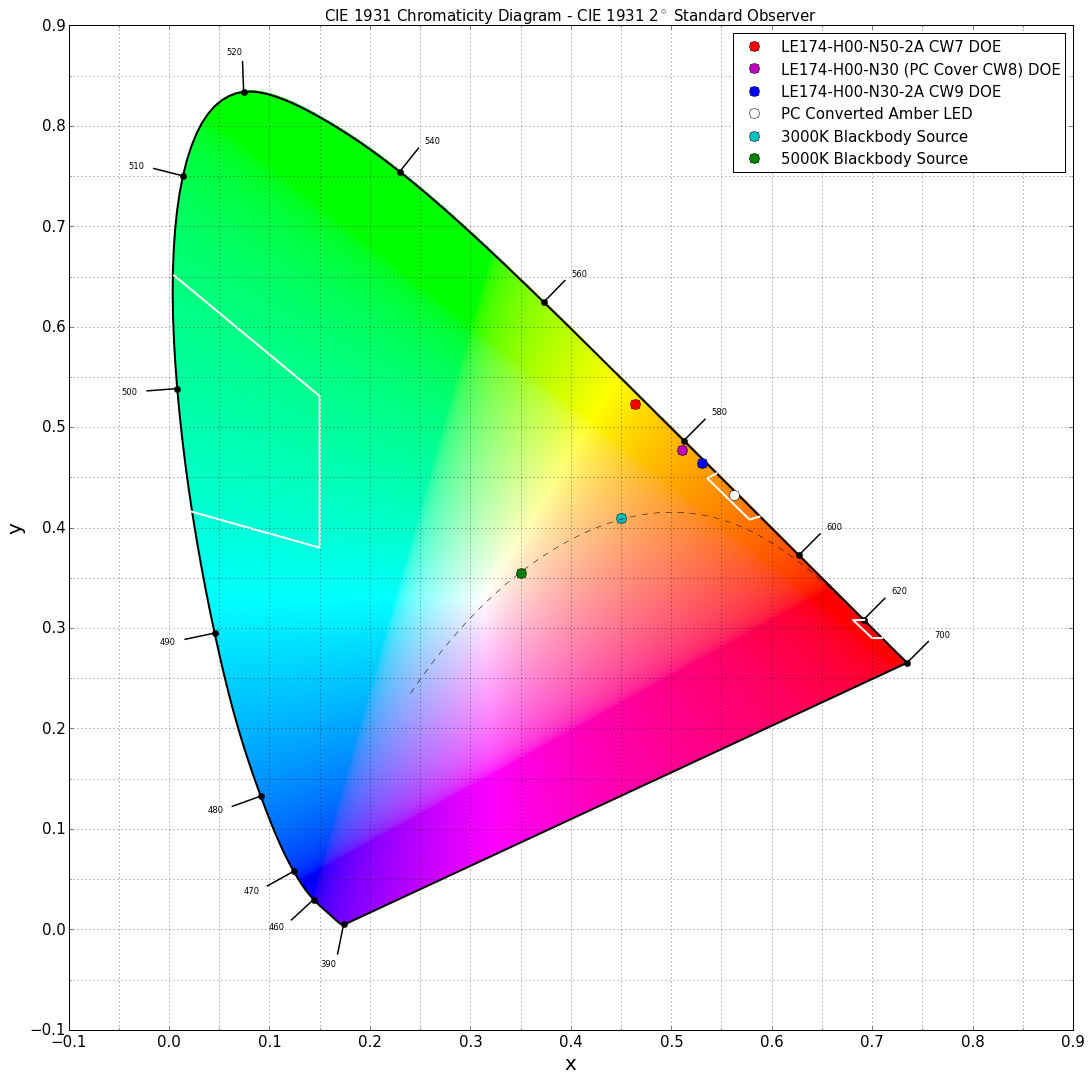

In [7]:
# Color Calculation Conclusion - Target inside Green A, nominal 0.2, 0.6
CIE1931 = np.array(pd.read_csv('./datasets/CIE1931_1nm.csv'))
CIE1931 = np.transpose(CIE1931)
CIE1931_x = CIE1931[0,:]
CIE1931_y = CIE1931[1,:]
CIE_1931_chromaticity_diagram_plot(standalone = False)
#planckian_locus_CIE_1931_chromaticity_diagram_plot[()]
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.plot(0.464, 0.523, 'ro',  markersize = 10, label = 'LE174-H00-N50-2A CW7 DOE')
plt.plot(0.511, 0.477, 'mo', markersize = 10, label = 'LE174-H00-N30 (PC Cover CW8) DOE')
plt.plot(0.531, 0.464, 'bo', markersize = 10, label = 'LE174-H00-N30-2A CW9 DOE')
plt.plot(0.562, 0.432, 'wo', markersize = 10, label = 'PC Converted Amber LED')
plt.plot(0.45, 0.41, 'co', markersize = 10, label = '3000K Blackbody Source')
plt.plot(0.35, 0.355, 'go', markersize = 10, label = '5000K Blackbody Source')
plt.plot(Blackbody_xy[0], Blackbody_xy[1], '--', color = 'black', linewidth = 0.5)
plt.plot(Traf_Red[0], Traf_Red[1], '-', color='white', linewidth = 2)
plt.plot(Traf_Amber[0], Traf_Amber[1], '-', color ='white', linewidth=2)
plt.plot(Traf_Green[0], Traf_Green[1], '-', color ='white', linewidth=2)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.grid(True)
plt.legend(loc=1, fontsize  =15)
plt.xlim(-.1,.9), plt.ylim(-.1,.9)
plt.show()




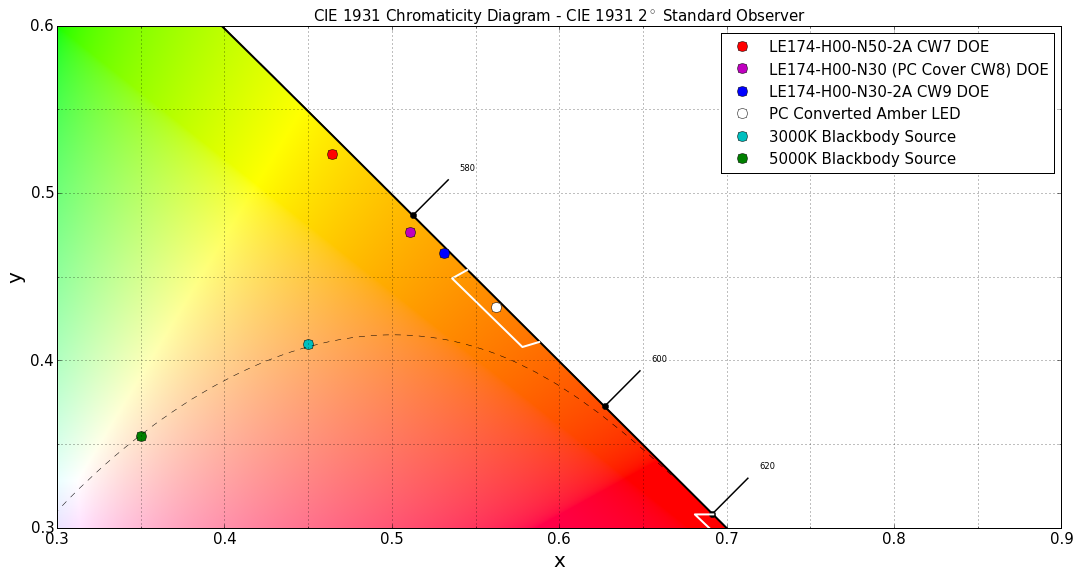

In [8]:
# Color Calculation Conclusion - Target inside Green A, nominal 0.2, 0.6
CIE1931 = np.array(pd.read_csv('./datasets/CIE1931_1nm.csv'))
CIE1931 = np.transpose(CIE1931)
CIE1931_x = CIE1931[0,:]
CIE1931_y = CIE1931[1,:]
CIE_1931_chromaticity_diagram_plot(standalone = False)
#planckian_locus_CIE_1931_chromaticity_diagram_plot[()]
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.plot(0.464, 0.523, 'ro',  markersize = 10, label = 'LE174-H00-N50-2A CW7 DOE')
plt.plot(0.511, 0.477, 'mo', markersize = 10, label = 'LE174-H00-N30 (PC Cover CW8) DOE')
plt.plot(0.531, 0.464, 'bo', markersize = 10, label = 'LE174-H00-N30-2A CW9 DOE')
plt.plot(0.562, 0.432, 'wo', markersize = 10, label = 'PC Converted Amber LED')
plt.plot(0.45, 0.41, 'co', markersize = 10, label = '3000K Blackbody Source')
plt.plot(0.35, 0.355, 'go', markersize = 10, label = '5000K Blackbody Source')
plt.plot(Blackbody_xy[0], Blackbody_xy[1], '--', color = 'black', linewidth = 0.5)
plt.plot(Traf_Red[0], Traf_Red[1], '-', color='white', linewidth = 2)
plt.plot(Traf_Amber[0], Traf_Amber[1], '-', color ='white', linewidth=2)
plt.plot(Traf_Green[0], Traf_Green[1], '-', color ='white', linewidth=2)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.grid(True)
plt.legend(loc=1, fontsize  =15)
plt.xlim(.3,.9), plt.ylim(.3,.6)
plt.show()

In [9]:
night_glow = np.array(pd.read_csv('./datasets/Night_glow.csv'))
night_glow = np.transpose(night_glow)

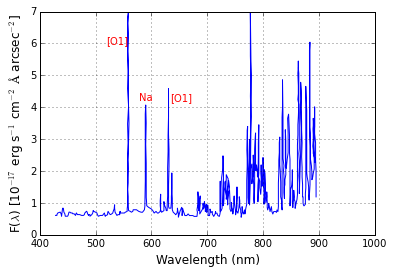

In [10]:
plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.ylabel('F($\lambda$) [10$^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA$ arcsec$^{-2}$]', fontsize = 12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.plot(night_glow[0], night_glow[1], '-', color = 'b', linewidth = 1)
plt.grid(True)
plt.annotate('[O1]', (520, 6), color ='r')
plt.annotate('Na', (580, 4.2), color ='r')
plt.annotate('[O1]', (635, 4.2), color ='r')
plt.xlim(400, 1000)
plt.show()

In [11]:
thinned_CCD = np.array(pd.read_csv('./datasets/Thinned_CCD_Response.csv'))
thinned_CCD = np.transpose(thinned_CCD)
thinned_CCD[0] = thinned_CCD[0]*1000

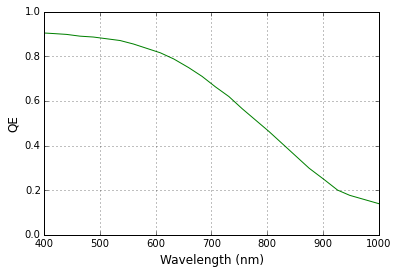

In [12]:
plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.ylabel('QE', fontsize = 12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.plot(thinned_CCD[0], thinned_CCD[1], '-', color = 'green', linewidth = 1)
plt.grid(True)
plt.xlim(400, 1000)
plt.ylim(0,1)
plt.show()

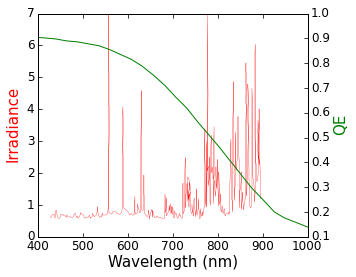

In [13]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

if 1:

    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)

    par1 = host.twinx()
    #par2 = host.twinx()

    offset = 60
    #new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    #par2.axis["right"] = new_fixed_axis(loc="right",axes=par2,offset=(offset, 0))
        
    #par2.axis["right"].toggle(all=True)



    #host.set_xlim(0, 2)
    #host.set_ylim(0, 1.0)

    host.set_xlabel("Wavelength (nm)")
    host.set_ylabel("Irradiance")
    par1.set_ylabel("QE")
    #par2.set_ylabel("Velocity")

    p1, = host.plot(night_glow[0], night_glow[1], label="Irradiance", linewidth = 0.3)
    p2, = par1.plot(thinned_CCD[0], thinned_CCD[1], label="QE")
    #p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

    #par1.set_ylim(0, 4)
    #par2.set_ylim(1, 65)

    #host.legend()

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    #par2.axis["right"].label.set_color(p3.get_color())
    plt.xlim(400, 1000)


    plt.draw()
    plt.show()


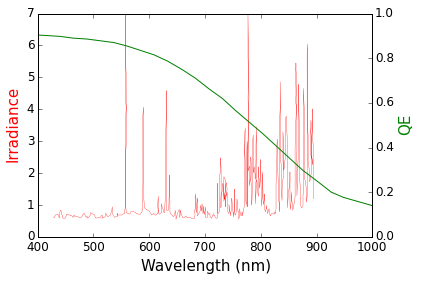

In [14]:
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("Wavelength (nm)")
host.set_ylabel("Irradiance")
par.set_ylabel("QE")

p1, = host.plot(night_glow[0], night_glow[1], label="Irradiance", linewidth = 0.3)
p2, = par.plot(thinned_CCD[0], thinned_CCD[1], label="QE")

#leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
#leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
#leg.texts[1].set_color(p2.get_color())
plt.xlim(400, 1000)
par.set_ylim(0,1 )

plt.show()


In [15]:
Sloan_Filters = np.array(pd.read_csv('./datasets/Sloan_Filters.csv'))
Sloan_Filters = np.transpose(Sloan_Filters)

wl_sloan = pd.Series.from_array(Sloan_Filters[0, 3:1804]).astype(np.float)

u_prime = pd.Series.from_array(Sloan_Filters[1, 3:1804]).astype(np.float)
g_prime = pd.Series.from_array(Sloan_Filters[2, 3:1804]).astype(np.float)
r_prime = pd.Series.from_array(Sloan_Filters[3, 3:1804]).astype(np.float)
i_prime = pd.Series.from_array(Sloan_Filters[4, 3:1804]).astype(np.float)
z_prime = pd.Series.from_array(Sloan_Filters[5, 3:1804]).astype(np.float)

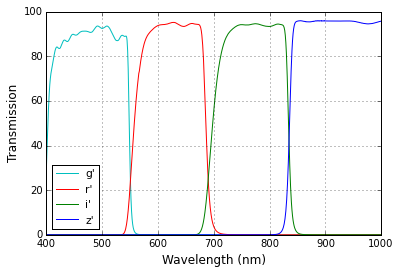

In [16]:
plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.ylabel('Transmission', fontsize = 12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.plot(wl_sloan, u_prime, '-', color = 'm', linewidth = 1, label = "u'")
plt.plot(wl_sloan, g_prime, '-', color = 'c', linewidth = 1, label = "g'")
plt.plot(wl_sloan, r_prime, '-', color = 'r', linewidth = 1, label = "r'")
plt.plot(wl_sloan, i_prime, '-', color = 'g', linewidth = 1, label = "i'")
plt.plot(wl_sloan, z_prime, '-', color = 'b', linewidth = 1, label = "z'")
plt.ylim(0, 100)
plt.xlim(400, 1000)
plt.legend(loc=3)
plt.grid(True)
plt.show()

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


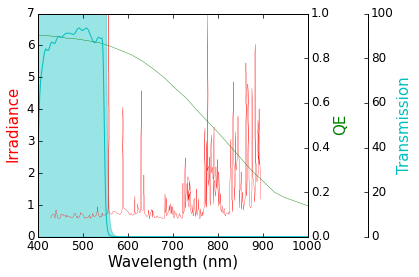

In [17]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

if 1:

    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()

    offset = 60
    new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    par2.axis["right"] = new_fixed_axis(loc="right",axes=par2,offset=(offset, 0))
        
    par2.axis["right"].toggle(all=True)

    host.set_xlabel("Wavelength (nm)")
    host.set_ylabel("Irradiance")
    par1.set_ylabel("QE")
    par2.set_ylabel("Transmission")

    p1, = host.plot(night_glow[0], night_glow[1], label="Irradiance", linewidth = 0.3)
    p2, = par1.plot(thinned_CCD[0], thinned_CCD[1], label="QE", linewidth = 0.4)
    p3, = par2.plot(wl_sloan, g_prime, label="Transmission", color = 'c')
    
    plt.fill_between(wl_sloan, g_prime, color = 'c', alpha = 0.4)
    plt.ylim(0,7)

    par1.set_ylim(0,1 )
    par2.set_ylim(0, 100)

    #host.legend()

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    par2.axis["right"].label.set_color(p3.get_color())
    plt.xlim(400, 1000)


    plt.draw()
    plt.show()


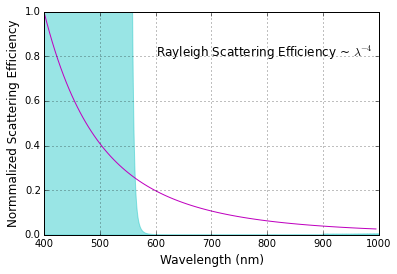

In [18]:
#Rayleigh Scattering

wl_rs = pd.Series(range(400, 1000, 5))
rs = 1/(wl_rs**4)
rs = rs/max(rs)

plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.ylabel('Normmalized Scattering Efficiency', fontsize = 12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.plot(wl_rs, rs, '-', color = 'm', linewidth = 1)
plt.fill_between(wl_sloan, g_prime, color = 'c', alpha = 0.4)
plt.ylim(0, 1)
plt.xlim(400, 1000)
plt.annotate('Rayleigh Scattering Efficiency ~ $\lambda^{-4}}$', (600, 0.8), fontsize = 12)
plt.grid(True)
plt.show()

In [19]:
CW_LED = np.array(pd.read_csv('./datasets/LE174_H00_N50_2A_DOE.csv'))
CW_LED = np.transpose(CW_LED)
CW_wl = CW_LED[0, 20:]
CW_rs = CW_LED[2, 20:]
CW_rs = CW_rs/max(CW_rs)

WW_LED = np.array(pd.read_csv('./datasets/LE174_H00_N30_2A_29_DOE.csv'))
WW_LED = np.transpose(WW_LED)
WW_wl = WW_LED[0, 20:]
WW_rs = WW_LED[2, 20:]
WW_rs = WW_rs/max(WW_rs)

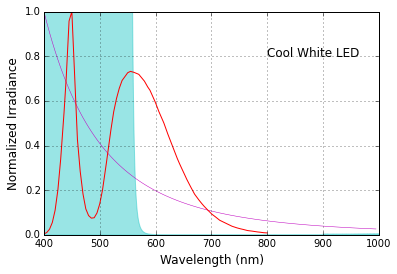

In [20]:
plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.ylabel('Normalized Irradiance', fontsize = 12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.plot(wl_rs, rs, '-', color = 'm', linewidth = .5)
plt.plot(CW_wl, CW_rs, '-', color = 'r', linewidth = 1)
plt.fill_between(wl_sloan, g_prime, color = 'c', alpha = 0.4)
plt.ylim(0, 1)
plt.xlim(400, 1000)
plt.annotate('Cool White LED', (800, 0.8), fontsize = 12)
plt.grid(True)
plt.show()

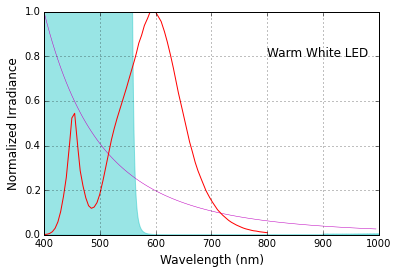

In [21]:
plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.ylabel('Normalized Irradiance', fontsize = 12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.plot(wl_rs, rs, '-', color = 'm', linewidth = .5)
plt.plot(WW_wl, WW_rs, '-', color = 'r', linewidth = 1)
plt.fill_between(wl_sloan, g_prime, color = 'c', alpha = 0.4)
plt.ylim(0, 1)
plt.xlim(400, 1000)
plt.annotate('Warm White LED', (800, 0.8), fontsize = 12)
plt.grid(True)
plt.show()

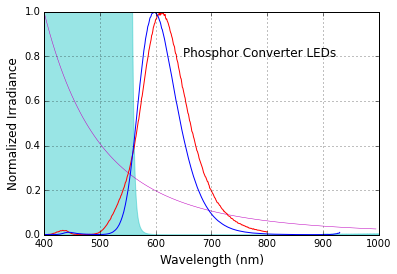

In [22]:
PC_Red = np.array(pd.read_csv('./datasets/PC_Amber.csv'))
PC_Red = np.transpose(PC_Red)
PC_Red_wl = PC_Red[0, 24:].astype(np.float)
PC_Red = PC_Red[1, 24:].astype(np.float)

PC_Amber = np.array(pd.read_csv('./datasets/Philips_Amber_PC_LED.csv'))
PC_Amber = np.transpose(PC_Amber)
PC_Amber_wl = pd.Series.from_array(PC_Amber[0, 139:])
PC_Amber = pd.Series.from_array(PC_Amber[1, 139:])
PC_Amber = PC_Amber/max(PC_Amber)

plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.ylabel('Normalized Irradiance', fontsize = 12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.plot(wl_rs, rs, '-', color = 'm', linewidth = .5)
plt.plot(PC_Red_wl, PC_Red, '-', color = 'r', linewidth = 1)
plt.plot(PC_Amber_wl, PC_Amber, '-', color = 'b', linewidth = 1)
plt.fill_between(wl_sloan, g_prime, color = 'c', alpha = 0.4)
plt.ylim(0, 1)
plt.xlim(400, 1000)
plt.annotate('Phosphor Converter LEDs', (650, 0.8), fontsize = 12)
plt.grid(True)
plt.show()

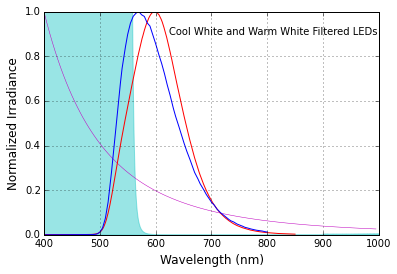

In [24]:
WW_Fled = np.array(pd.read_csv('./datasets/WW_CW9.csv'))
WW_Fled = np.transpose(WW_Fled)

WW_Fled_wl = pd.Series.from_array(WW_Fled[0, 106:]).astype(np.float)
WW_Fled = pd.Series.from_array(WW_Fled[1, 106:]).astype(np.float)
WW_Fled = WW_Fled/max(WW_Fled)

CW_Fled = np.array(pd.read_csv('./datasets/LE174_H00_N50_2A_CW9_DOE.csv'))
CW_Fled = np.transpose(CW_Fled)
CW_Fled_wl = CW_Fled[0, 20:]
CW_Fled = CW_Fled[2, 20:]
CW_Fled = CW_Fled/max(CW_Fled)

plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.ylabel('Normalized Irradiance', fontsize = 12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.plot(wl_rs, rs, '-', color = 'm', linewidth = .5)
plt.plot(WW_Fled_wl, WW_Fled, '-', color = 'r', linewidth = 1)
plt.plot(CW_Fled_wl, CW_Fled, '-', color = 'b', linewidth = 1)
plt.fill_between(wl_sloan, g_prime, color = 'c', alpha = 0.4)
plt.ylim(0, 1)
plt.xlim(400, 1000)
plt.annotate('Cool White and Warm White Filtered LEDs', (624, 0.9), fontsize = 10)
plt.grid(True)
plt.show()